In [22]:
import json, urllib
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import folium
import seaborn as sns

In [2]:
bus_stops_data = pd.read_json('https://data.smartdublin.ie/cgi-bin/rtpi/busstopinformation?stopid&format=json')

In [3]:
bus_stops_data.head()

errorcode errormessage  numberofresults  \
0          0                         10091   
1          0                         10091   
2          0                         10091   
3          0                         10091   
4          0                         10091   

                                             results           timestamp  
0  {'shortname': 'Parnell Square', 'stopid': '2',... 2018-05-09 16:27:38  
1  {'shortname': 'Parnell Square', 'stopid': '3',... 2018-05-09 16:27:38  
2  {'shortname': 'Parnell Square', 'stopid': '4',... 2018-05-09 16:27:38  
3  {'shortname': 'Parnell Square', 'stopid': '6',... 2018-05-09 16:27:38  
4  {'shortname': 'Parnell Square', 'stopid': '7',... 2018-05-09 16:27:38

In [4]:
bus_stops_data['results'][0]

{'displaystopid': '2',
 'fullname': 'Parnell Square',
 'fullnamelocalized': '',
 'lastupdated': '03/09/2018 11:38:22',
 'latitude': '53.35224111',
 'longitude': '-6.263695',
 'operators': [{'name': 'bac',
   'routes': ['38B', '38D', '38', '38A', '46A', '46E']}],
 'shortname': 'Parnell Square',
 'shortnamelocalized': 'Cearnóg Parnell',
 'stopid': '2'}

In [5]:
routes = [el['operators'][0]['routes'] for el in bus_stops_data['results']]

In [6]:
routes

[['38B', '38D', '38', '38A', '46A', '46E'],
 ['122', '120'],
 ['9', '7', '7D', '7A', '7B'],
 ['4'],
 ['40', '140', '40B', '40D', '13'],
 ['16'],
 ['11', '1', '44'],
 ['40', '13', '40B', '40D'],
 ['11', '16', '44', '1', '122'],
 ['1', '44', '40', '11', '122', '13', '40B', '40D', '16'],
 ['16', '40D', '40B', '33', '13', '11', '40', '44', '41', '41B', '41C', '1'],
 ['70D', '122'],
 ['13', '11', '33', '16', '41C', '41B', '41', '44', '1'],
 ['1', '44', '41', '41B', '41C', '16', '33', '11', '13'],
 ['13', '11', '33', '16', '41C', '41B', '41', '44', '1'],
 ['1', '44', '41', '41B', '41C', '16', '33', '13', '11'],
 ['11'],
 ['11'],
 ['11'],
 ['11'],
 ['11', '13', '70D', '4', '9'],
 ['9', '4', '70D', '13', '11'],
 ['11', '13', '70D', '4', '9'],
 ['120'],
 ['11'],
 ['11'],
 ['11'],
 ['11'],
 ['11'],
 ['11', '13', '9', '4', '70D'],
 ['70D', '4', '9', '13', '11'],
 ['11', '13', '9', '4', '70D'],
 ['4', '9', '11'],
 ['11'],
 ['11'],
 ['11'],
 ['11', '16', '13', '33', '16C', '1', '41A', '41B', '41C',

In [7]:
stop_data = pd.DataFrame()

In [8]:
stop_data.head()

Empty DataFrame
Columns: []
Index: []

In [9]:
stop_data['StopID'] = [el['stopid'] for el in bus_stops_data['results']]
stop_data['Latitude'] = [float(el['latitude']) for el in bus_stops_data['results']]
stop_data['Longitude'] = [float(el['longitude']) for el in bus_stops_data['results']]
stop_data['routes'] = [el['operators'][0]['routes'] for el in bus_stops_data['results']]


In [10]:
stop_data.head()

StopID   Latitude  Longitude                         routes
0      2  53.352241  -6.263695  [38B, 38D, 38, 38A, 46A, 46E]
1      3  53.352307  -6.263783                     [122, 120]
2      4  53.352567  -6.264166             [9, 7, 7D, 7A, 7B]
3      6  53.352744  -6.264443                            [4]
4      7  53.352836  -6.264562        [40, 140, 40B, 40D, 13]

In [11]:
stop_data=stop_data.loc[stop_data['Longitude']<=-6]
stop_data=stop_data.loc[stop_data['Longitude']>=-6.50]

stop_data=stop_data.loc[stop_data['Latitude']<=53.42]
stop_data=stop_data.loc[stop_data['Latitude']>=53.23]

stop_data = stop_data.dropna(subset=['Longitude', 'Latitude'])

In [12]:
stop_data.count()

StopID       4107
Latitude     4107
Longitude    4107
routes       4107
dtype: int64

(-6.5, -6.0)

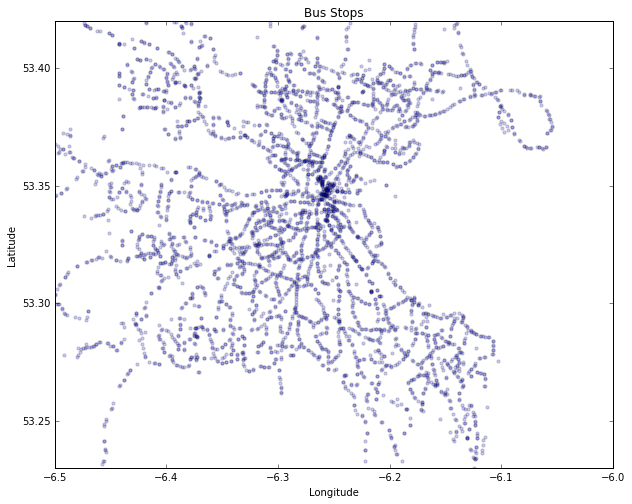

In [23]:
dub_long_border =(-6.50, -6.0)
dub_lat_border =(53.23, 53.42)

stop_data.plot(kind='scatter', x='Longitude', y='Latitude',
                color='blue', alpha=0.2, s=10)
plt.title("Bus Stops")

plt.ylim(dub_lat_border)
plt.xlim(dub_long_border)

In [14]:
stop_data['Latitude3'] = stop_data['Latitude'].apply(lambda x : round(x,3))
stop_data['Longitude3'] = stop_data['Longitude'].apply(lambda x : round(x,3))

In [15]:
dublin_map = folium.Map(location = [53.343817,-6.275367],zoom_start = 11,)

In [24]:
for index, stop_row in stop_data.iterrows():
    folium.CircleMarker([stop_row['Latitude'],stop_row['Longitude']], radius=3, color='blue', fill_opacity=0.9).add_to(dublin_map)


dublin_map

In [17]:
stops_usage = dict()
for el in stop_data["routes"]:
    for bus_numb in el:
        if bus_numb in stops_usage.keys():
            stops_usage[bus_numb]= stops_usage[bus_numb]+1
        else:
            stops_usage[bus_numb] = 1

In [18]:
routes = pd.DataFrame()
routes["Route_Number"] = stops_usage.keys()
routes["Number_of_Stops"] = stops_usage.values()
routes_use_most_stops = routes.sort_values(by="Number_of_Stops", ascending=False)

In [19]:
routes_use_most_stops.head()

Route_Number  Number_of_Stops
130           13              182
17            27              182
153           40              175
39            75              170
83           220              169

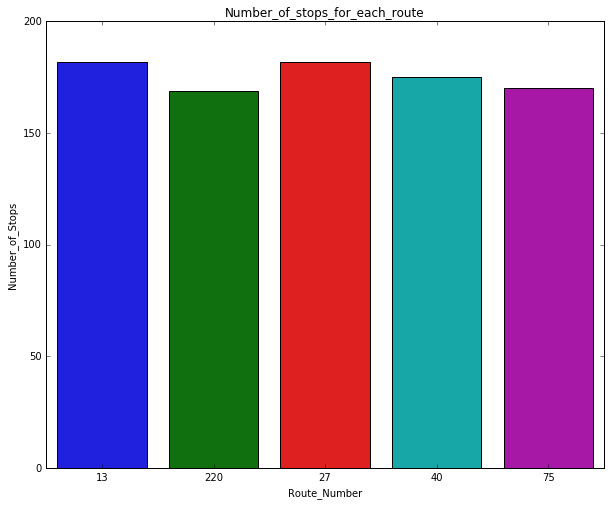

In [25]:
sns.barplot(x='Route_Number',y='Number_of_Stops',data=routes_use_most_stops.head()).set_title("Number_of_stops_for_each_route")